# Proyecto a mitad del bootcamp - Clasificacion

Estructura del proyecto

1. Importar bibliotecas y cargar el conjunto de datos
2. Visión general del conjunto de datos
3. Limpieza de datos
4. Separar los datos entre variables numéricas y categóricas.
5. Modelos
6. Conclusiones

## 1. Importar bibliotecas y cargar el conjunto de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



In [4]:

df = pd.read_excel(r'C:\Users\marco\OneDrive\Desktop\ironhack\Proyectos\proyectos_ mitad\data_mid_bootcamp_project_classification\files\creditcardmarketing.xlsx')

## 2. Visión general del conjunto de datos

In [3]:
df.head()


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
df.shape

(18000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [6]:
# Indentificamos los tipos de datos de las columnas.
df.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
# Bank Accounts Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
# Credit Cards Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
# Homes Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Average Balance,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Q1 Balance,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Q2 Balance,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Q3 Balance,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Q4 Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


## 3. Limpieza de datos

In [8]:
df.columns

Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [9]:
# Renombrar las columnas al español.
# voy a traducir las columnas de ingles a español
traducciones = {
    'Customer Number': 'id',
    'Offer Accepted': 'oferta_aceptada',
    'Reward': 'recompensa',
    'Mailer Type': 'tipo_de_remitente',
    'Income Level': 'nivel_de_ingreso',
    '# Bank Accounts Open': 'cuentas_bancarias_abiertas',
    'Overdraft Protection': 'proteccion_de_sobregiro',
    'Credit Rating': 'calificacion_crediticia',
    '# Credit Cards Held': 'tarjetas_de_credito_mantenidas',
    '# Homes Owned': 'viviendas_en_propiedad',
    'Household Size': 'tamaño_de_vivienda',
    'Own Your Home': 'sea_propietario_de_su_vivienda',
    'Average Balance': 'saldo_promedio',
    'Q1 Balance': 'saldo_T1',
    'Q2 Balance': 'saldo_T2',
    'Q3 Balance': 'saldo_T3',
    'Q4 Balance': 'saldo_T4',

       }
# Renombrar las columnas
df = df.rename(columns=traducciones)

# Verificar los cambios
df.head()

,id,oferta_aceptada,recompensa,tipo_de_remitente,nivel_de_ingreso,cuentas_bancarias_abiertas,proteccion_de_sobregiro,calificacion_crediticia,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,sea_propietario_de_su_vivienda,saldo_promedio,saldo_T1,saldo_T2,saldo_T3,saldo_T4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [10]:
df.dtypes

id                                  int64
oferta_aceptada                    object
recompensa                         object
tipo_de_remitente                  object
nivel_de_ingreso                   object
cuentas_bancarias_abiertas          int64
proteccion_de_sobregiro            object
calificacion_crediticia            object
tarjetas_de_credito_mantenidas      int64
viviendas_en_propiedad              int64
tamaño_de_vivienda                  int64
sea_propietario_de_su_vivienda     object
saldo_promedio                    float64
saldo_T1                          float64
saldo_T2                          float64
saldo_T3                          float64
saldo_T4                          float64
dtype: object

In [11]:
df.columns

Index(['id', 'oferta_aceptada', 'recompensa', 'tipo_de_remitente',
       'nivel_de_ingreso', 'cuentas_bancarias_abiertas',
       'proteccion_de_sobregiro', 'calificacion_crediticia',
       'tarjetas_de_credito_mantenidas', 'viviendas_en_propiedad',
       'tamaño_de_vivienda', 'sea_propietario_de_su_vivienda',
       'saldo_promedio', 'saldo_T1', 'saldo_T2', 'saldo_T3', 'saldo_T4'],
      dtype='object')

In [12]:
# Ahora voy ha realizar la limpieza de datos, primero mirare si hay NaNs.

df.isnull().sum() # Puedo observar que no hay NaNs



id                                 0
oferta_aceptada                    0
recompensa                         0
tipo_de_remitente                  0
nivel_de_ingreso                   0
cuentas_bancarias_abiertas         0
proteccion_de_sobregiro            0
calificacion_crediticia            0
tarjetas_de_credito_mantenidas     0
viviendas_en_propiedad             0
tamaño_de_vivienda                 0
sea_propietario_de_su_vivienda     0
saldo_promedio                    24
saldo_T1                          24
saldo_T2                          24
saldo_T3                          24
saldo_T4                          24
dtype: int64

Viendo que el número de NaNs es muy pequeño (24) en relaccion a la cantidad de datos (18.000) que hay, los voy a eliminar.

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum() 

id                                0
oferta_aceptada                   0
recompensa                        0
tipo_de_remitente                 0
nivel_de_ingreso                  0
cuentas_bancarias_abiertas        0
proteccion_de_sobregiro           0
calificacion_crediticia           0
tarjetas_de_credito_mantenidas    0
viviendas_en_propiedad            0
tamaño_de_vivienda                0
sea_propietario_de_su_vivienda    0
saldo_promedio                    0
saldo_T1                          0
saldo_T2                          0
saldo_T3                          0
saldo_T4                          0
dtype: int64

In [15]:
# Voy a ver si hay valores duplicados:

df.duplicated().any() # No hay valores duplicados

False

In [16]:
df.to_csv('01_clasificacion.csv', index= False)

In [17]:
df.shape

(17976, 17)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,17976.0,8999.727192,5196.958865,1.00,4498.75,9000.5,13501.25,18000.00
cuentas_bancarias_abiertas,17976.0,1.255730,0.472405,1.00,1.00,1.0,1.00,3.00
tarjetas_de_credito_mantenidas,17976.0,1.903427,0.797086,1.00,1.00,2.0,2.00,4.00
viviendas_en_propiedad,17976.0,1.203549,0.427446,1.00,1.00,1.0,1.00,3.00
tamaño_de_vivienda,17976.0,3.499110,1.114476,1.00,3.00,3.0,4.00,9.00
saldo_promedio,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
saldo_T1,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
saldo_T2,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
saldo_T3,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
saldo_T4,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [19]:
df = df.set_index('id')
df

,oferta_aceptada,recompensa,tipo_de_remitente,nivel_de_ingreso,cuentas_bancarias_abiertas,proteccion_de_sobregiro,calificacion_crediticia,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,sea_propietario_de_su_vivienda,saldo_promedio,saldo_T1,saldo_T2,saldo_T3,saldo_T4
id,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0


## 4. Separar los datos entre variables numéricas y categóricas.

In [20]:
# Selecciono solo las columnas numéricas
df_numericas = df.select_dtypes(include='number')

df_numericas.head()

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_promedio,saldo_T1,saldo_T2,saldo_T3,saldo_T4
id,,,,,,,,,
1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [21]:
df_categorical= df.select_dtypes(exclude = 'number')
df_categorical.head()

,oferta_aceptada,recompensa,tipo_de_remitente,nivel_de_ingreso,proteccion_de_sobregiro,calificacion_crediticia,sea_propietario_de_su_vivienda
id,,,,,,,
1,No,Air Miles,Letter,High,No,High,No
2,No,Air Miles,Letter,Medium,No,Medium,Yes
3,No,Air Miles,Postcard,High,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No
5,No,Air Miles,Letter,Medium,No,Medium,Yes


### Valores numéricos:


Como nuestro objetivo es construir un modelo que proporcione información sobre por qué algunos clientes bancarios aceptan ofertas de tarjetas de crédito, tenemos que ver como son los clientes que aceptan.

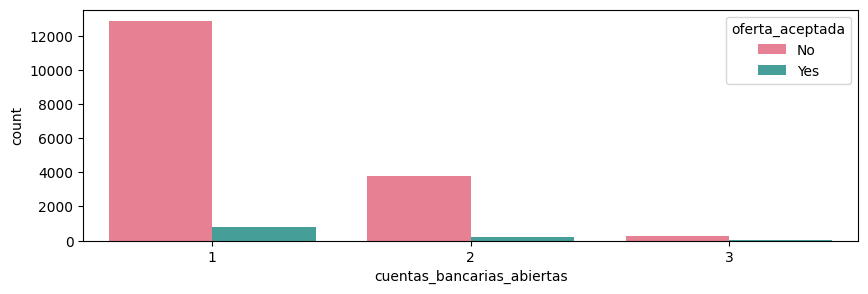

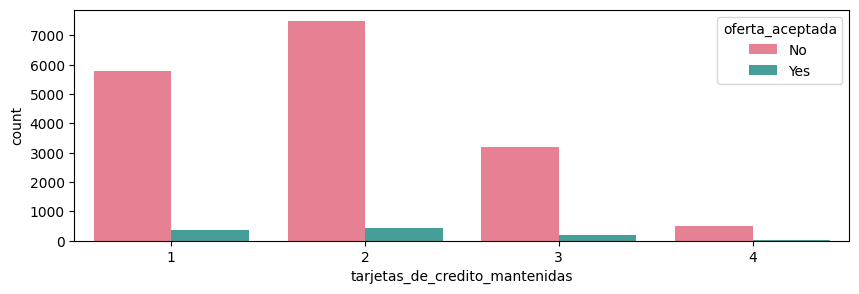

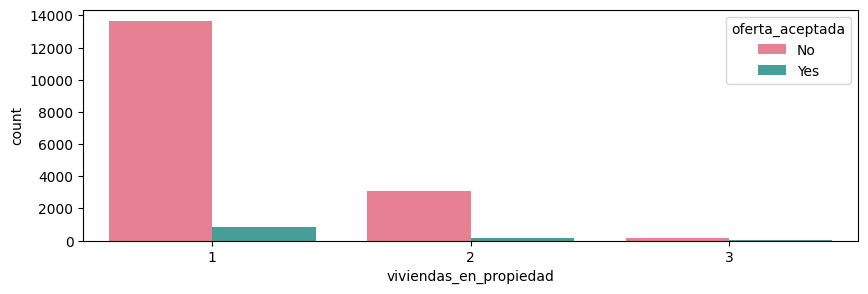

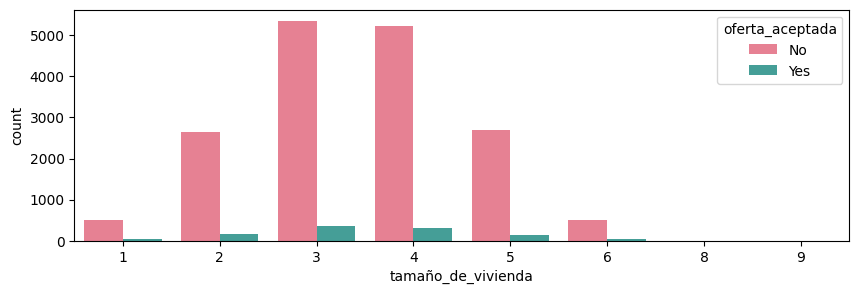

In [22]:
for column in df_numericas.columns[0:4]:
    if not column in ['customer_number']:
        plt.figure(figsize=(10,3))
        sns.countplot(data=df, x=df_numericas[column], hue=df['oferta_aceptada'],palette='husl')
        plt.show()

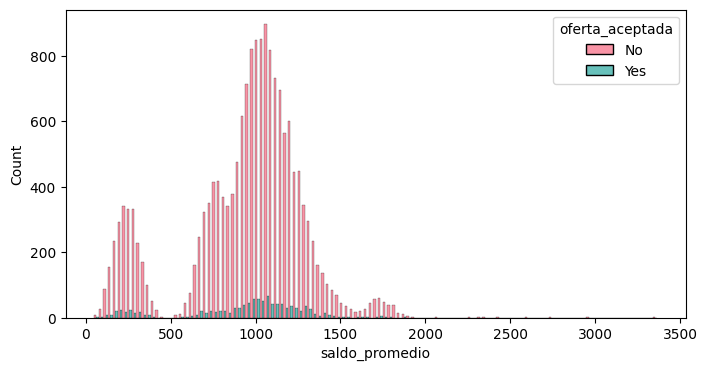

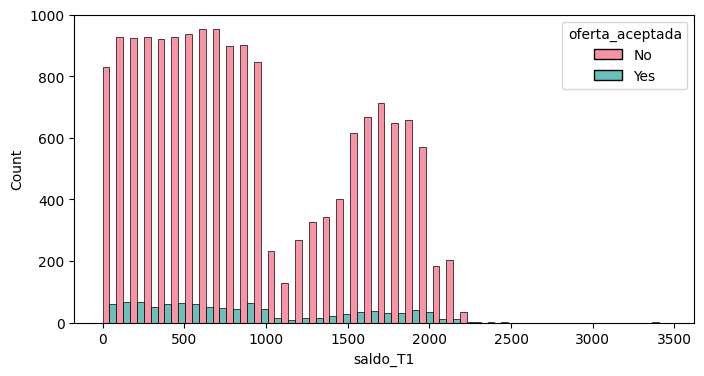

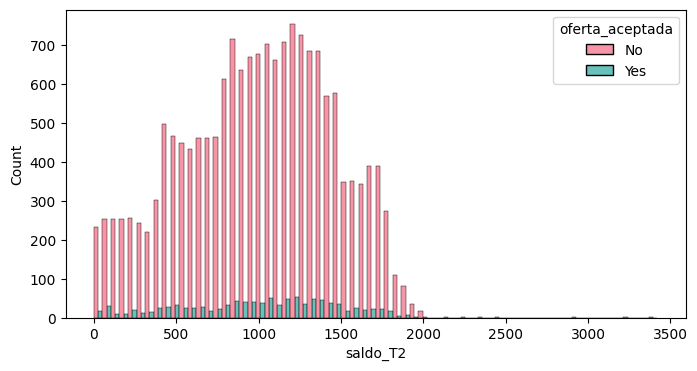

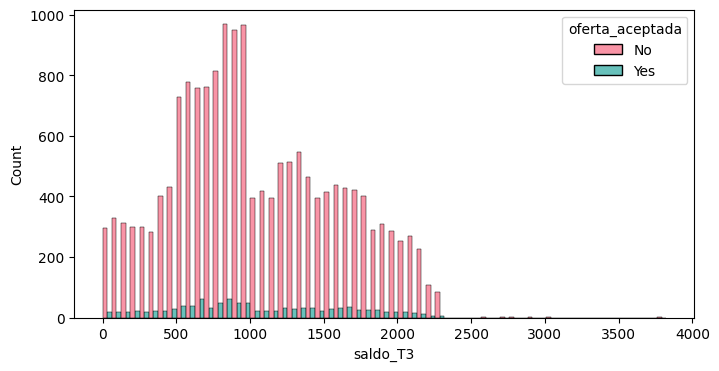

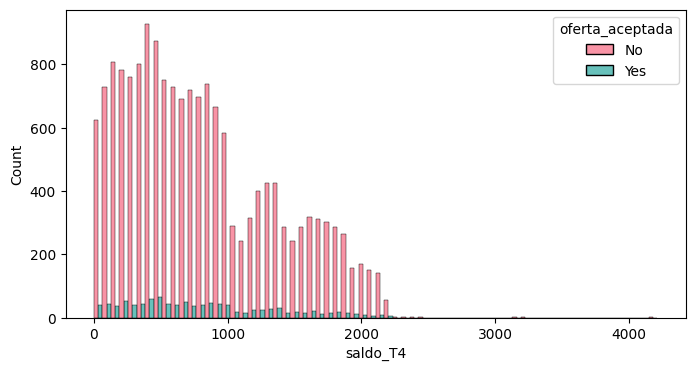

In [23]:
for column in df_numericas.columns[4:9]:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=column, hue='oferta_aceptada', multiple='dodge', palette='husl')
        plt.show()


In [24]:
corr_matrix = df_numericas.corr()

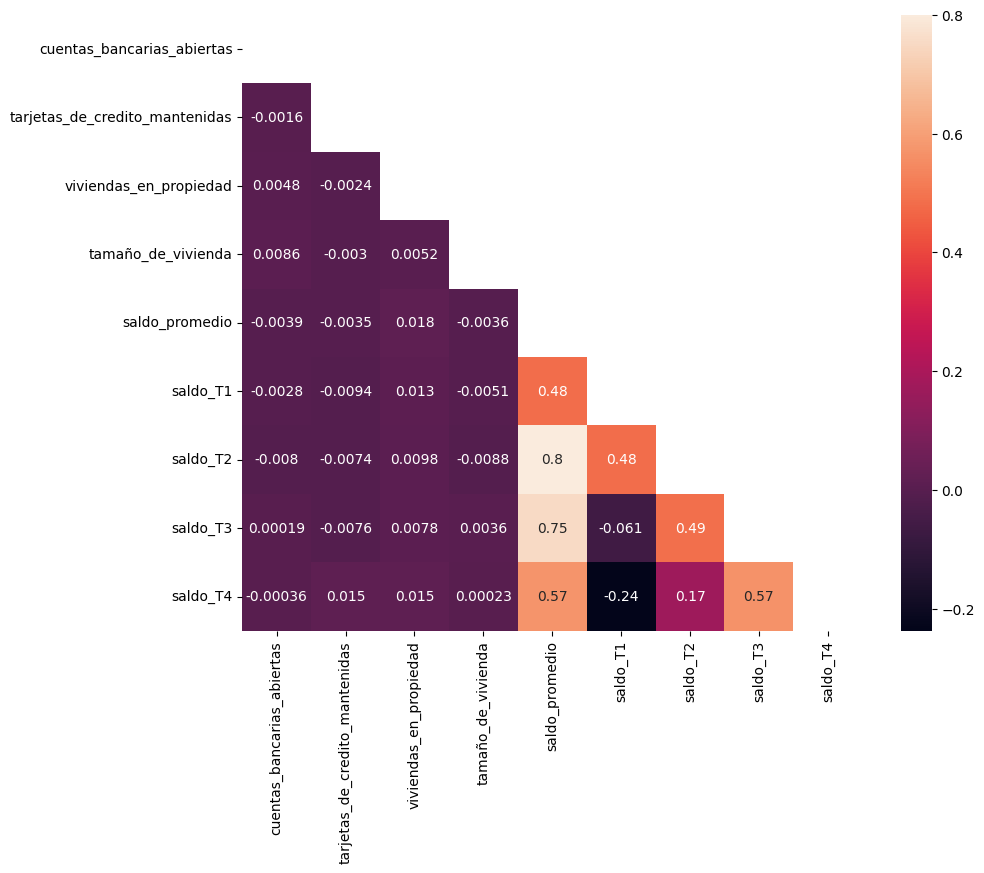

In [25]:
mask = np.zeros_like(df_numericas.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_numericas.corr(), mask=mask, annot=True)
plt.show()

Puedo observar que por lo general no hay correlación entre las variables numéricas, a excepcin de la variable saldo promedio y los saldos T1, T2, T3 y T4, por ello voy a cerar dos dataframes, uno con los trimestres y otro con el saldo promedio.

In [26]:
numerical_saldo_promedio = df_numericas.drop(['saldo_T1', 'saldo_T2', 'saldo_T3', 'saldo_T4'], axis=1)
numerical_saldo_promedio.head()


,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_promedio
id,,,,,
1,1,2,1,4,1160.75
2,1,2,2,5,147.25
3,2,2,1,2,276.50
4,2,1,1,4,1219.00
5,1,2,1,6,1211.00


In [27]:
numerical_saldo_trimestral = df_numericas.drop(['saldo_promedio',], axis=1)
numerical_saldo_trimestral.head()

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_T1,saldo_T2,saldo_T3,saldo_T4
id,,,,,,,,
1,1,2,1,4,1669.0,877.0,1095.0,1002.0
2,1,2,2,5,39.0,106.0,78.0,366.0
3,2,2,1,2,367.0,352.0,145.0,242.0
4,2,1,1,4,1578.0,1760.0,1119.0,419.0
5,1,2,1,6,2140.0,1357.0,982.0,365.0


In [28]:
# Verificar si hay números negativos en todo el DataFrame
if (numerical_saldo_promedio < 0).any().any():
    print("El DataFrame contiene números negativos")
else:
    print("El DataFrame no contiene números negativos")

El DataFrame no contiene números negativos


In [29]:
if (numerical_saldo_trimestral < 0).any().any():
    print("El DataFrame contiene números negativos")
else:
    print("El DataFrame no contiene números negativos")

El DataFrame no contiene números negativos


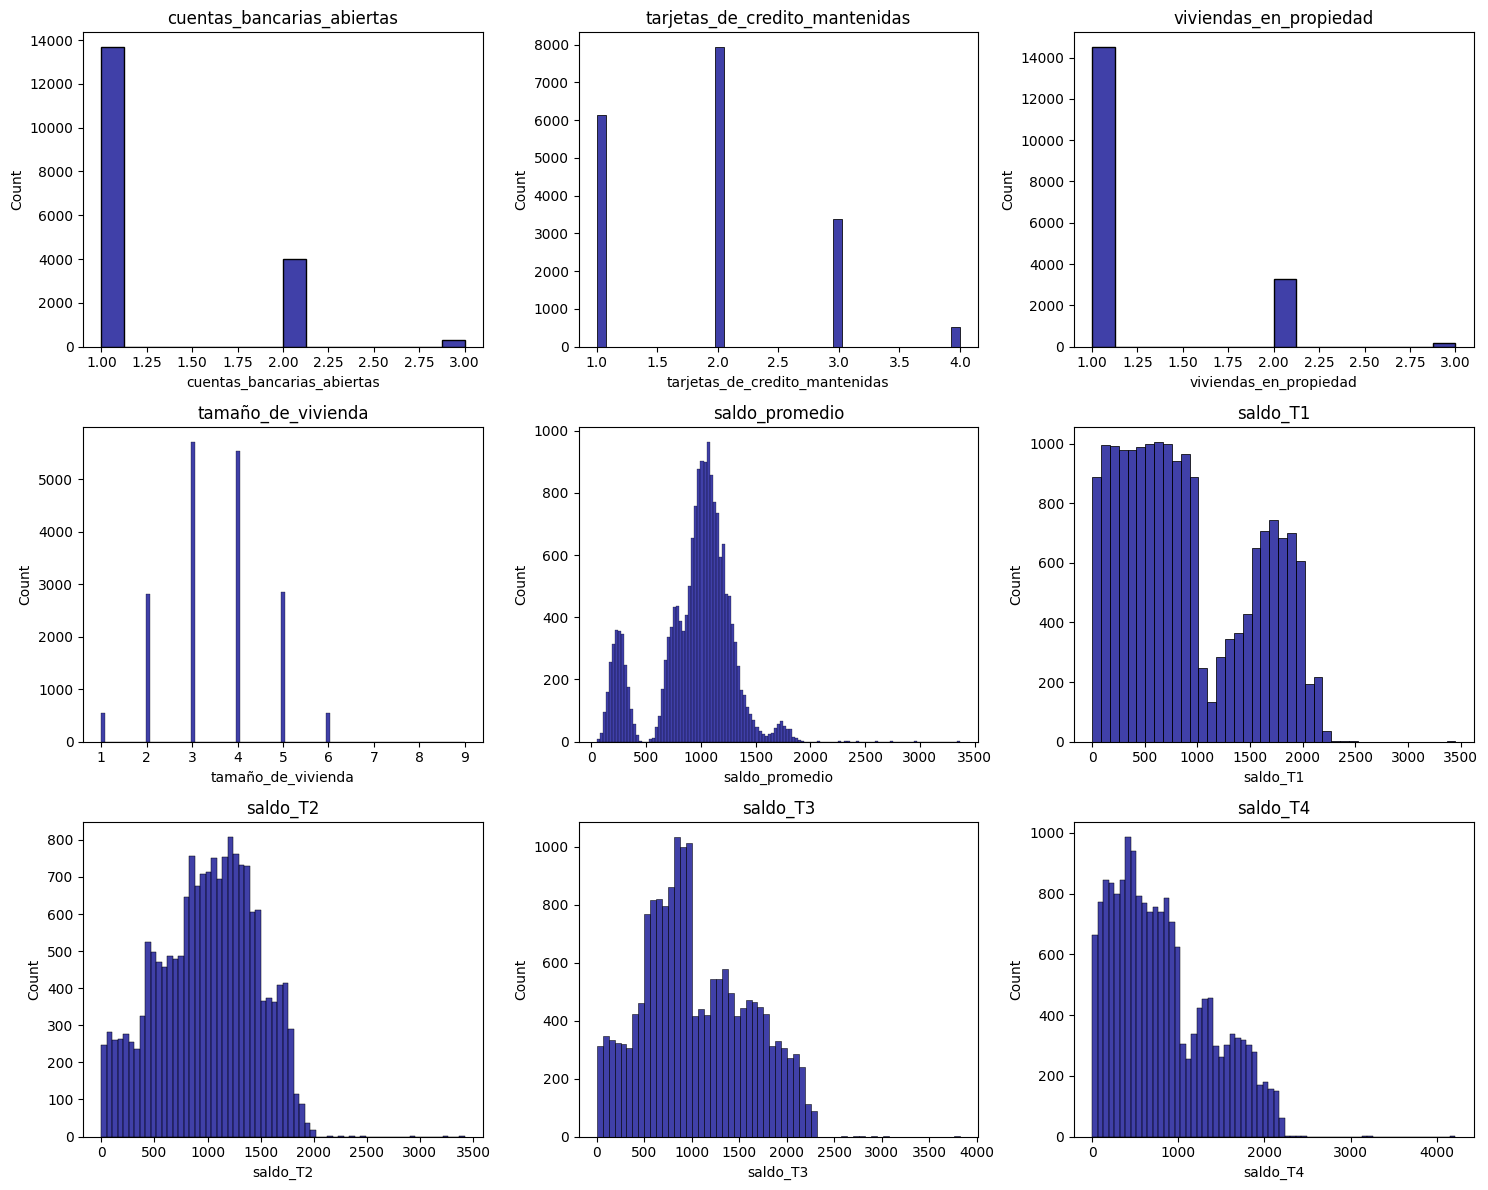

In [30]:


# Número de columnas para la cuadrícula
num_columns = 3
num_plots = len(df_numericas.columns)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, column in enumerate(df_numericas.columns):
    sns.histplot(df_numericas[column], ax=axes[i], kde=False, color='darkblue')
    axes[i].set_title(column)


plt.tight_layout()
plt.show()



En los gráficos anteriores, podemos ver que los saldos promedio y los saldos trimestrales son variables continua y el resto son discretas. 

<function matplotlib.pyplot.show(close=None, block=None)>

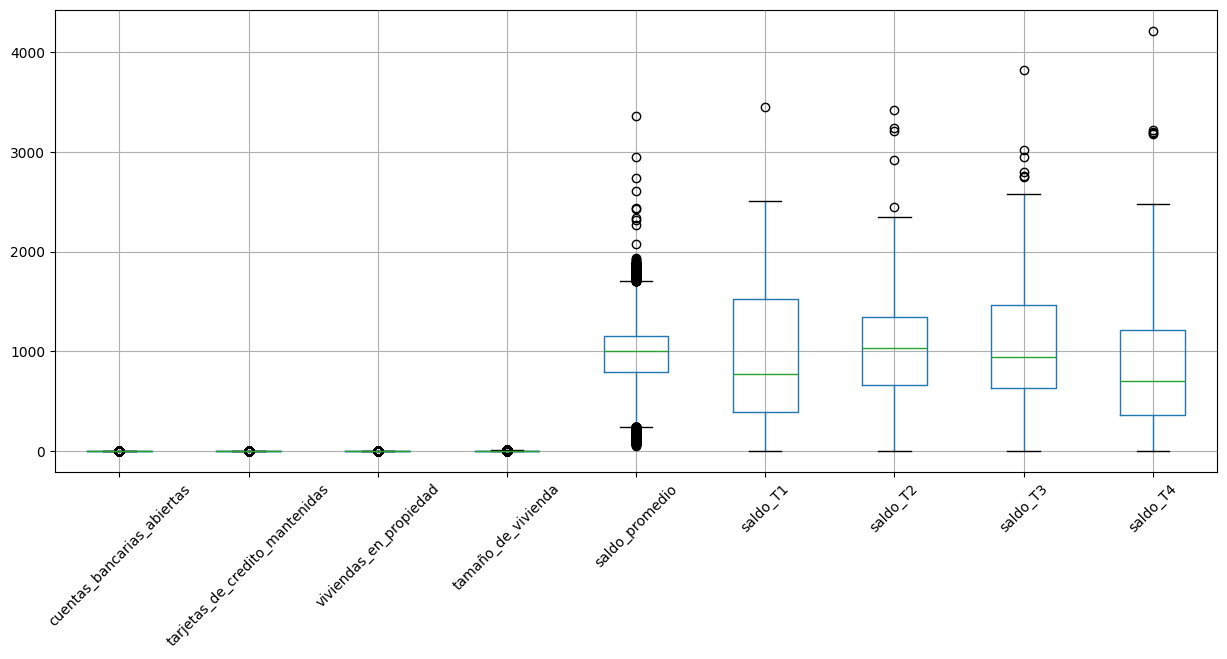

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
df_numericas.boxplot(ax=ax)
plt.xticks(rotation=45)
plt.show
     

### Transformation de datos numericos:

#### Numeros negativos:
Como más adelante usaremos la correlacion Box Cox hay que ver si las columnas tienen numeros negativos.

In [32]:
# Verificar si hay números negativos en todo el DataFrame
if (numerical_saldo_promedio < 0).any().any():
    print("El DataFrame contiene números negativos")
else:
    print("El DataFrame no contiene números negativos")

El DataFrame no contiene números negativos


In [33]:
if (numerical_saldo_trimestral < 0).any().any():
    print("El DataFrame contiene números negativos")
else:
    print("El DataFrame no contiene números negativos")

El DataFrame no contiene números negativos


#### Box Cox:

Box-Cox es una transformación estadística que se utiliza para estabilizar la varianza y hacer que los datos se aproximen más a una distribución normal.

In [34]:
import scipy.stats as stats

columnas_transfor_saldo_promedio = ['saldo_promedio']
columnas_transfor_trimestral = ['saldo_T1', 'saldo_T2', 'saldo_T3', 'saldo_T4']

for col in columnas_transfor_saldo_promedio:
    numerical_saldo_promedio[col], _ = stats.boxcox(numerical_saldo_promedio[col] + 1)

for col in columnas_transfor_trimestral:
    numerical_saldo_trimestral[col], _ = stats.boxcox(numerical_saldo_trimestral[col] + 1)


#### Estandarización:
Una vez aplicada Box Cox, voy a estandarizar los datos, lo que es necesario cuando se utilizan modelos de regresión.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
numerical_saldo_promedio_estand = scaler.fit_transform(numerical_saldo_promedio)
numerical_saldo_promedio_estand = pd.DataFrame(numerical_saldo_promedio_estand, columns=numerical_saldo_promedio.columns)

numerical_saldo_promedio_estand.head()

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_promedio
0,-0.541352,0.121161,-0.476212,0.449452,0.616723
1,-0.541352,0.121161,1.863330,1.346760,-2.027382
2,1.575537,0.121161,-0.476212,-1.345162,-1.788324
3,1.575537,-1.133443,-0.476212,0.449452,0.806347
4,-0.541352,0.121161,-0.476212,2.244067,0.780125


In [37]:
scaler = StandardScaler()
numerical_saldo_trimestral_estand = scaler.fit_transform(numerical_saldo_trimestral)
numerical_saldo_trimestral_estand = pd.DataFrame(numerical_saldo_trimestral_estand, columns=numerical_saldo_trimestral.columns)

numerical_saldo_trimestral_estand.head()

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_T1,saldo_T2,saldo_T3,saldo_T4
0,-0.541352,0.121161,-0.476212,0.449452,1.146668,-0.251899,0.184885,0.505440
1,-0.541352,0.121161,1.863330,1.346760,-1.973363,-1.998067,-2.098818,-0.696218
2,1.575537,0.121161,-0.476212,-1.345162,-0.793575,-1.420652,-1.862524,-1.048943
3,1.575537,-1.133443,-0.476212,0.449452,1.046546,1.635161,0.225748,-0.565470
4,-0.541352,0.121161,-0.476212,2.244067,1.624969,0.782233,-0.011469,-0.698780


##### Outliers
Puedo observar que hay algunos outliers en las variables saldo_promedio, saldo_T1, saldo_T2, saldo_T3 y saldo_T4, por eso los detectaremos y los eliminate.


In [38]:
for var in numerical_saldo_promedio_estand:
    q1 = numerical_saldo_promedio_estand[var].quantile(0.25)
    q3 = numerical_saldo_promedio_estand[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 4*iqr
    upper_bound = q3 + 4*iqr
    num_saldo_prom_estand_sin_outliers = numerical_saldo_promedio_estand[(numerical_saldo_promedio_estand[var] >= lower_bound) & (numerical_saldo_promedio_estand[var] <= upper_bound)]
     

# Imprimir el número de filas antes y después de eliminar los outliers
print(f"Número de filas antes de eliminar outliers: {numerical_saldo_promedio_estand.shape[0]}")
print(f"Número de filas después de eliminar outliers: {num_saldo_prom_estand_sin_outliers.shape[0]}")

Número de filas antes de eliminar outliers: 17976
Número de filas después de eliminar outliers: 17970


In [39]:
for var in numerical_saldo_trimestral_estand:
    q1 = numerical_saldo_trimestral_estand[var].quantile(0.25)
    q3 = numerical_saldo_trimestral_estand[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 4*iqr
    upper_bound = q3 + 4*iqr
    nume_saldo_trim_estand_sin_outliers = numerical_saldo_trimestral_estand[(numerical_saldo_trimestral_estand[var] >= lower_bound) & (numerical_saldo_trimestral_estand[var] <= upper_bound)]

# Imprimir el número de filas antes y después de eliminar los outliers
print(f"Número de filas antes de eliminar outliers: {numerical_saldo_trimestral_estand.shape[0]}")
print(f"Número de filas después de eliminar outliers: {nume_saldo_trim_estand_sin_outliers.shape[0]}")

Número de filas antes de eliminar outliers: 17976
Número de filas después de eliminar outliers: 17976


In [40]:
for var in df_numericas:
    q1 = df_numericas[var].quantile(0.25)
    q3 = df_numericas[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df_numericas_sin_outliers = df_numericas[(df_numericas[var] >= lower_bound) & (df_numericas[var] <= upper_bound)]
     
# Imprimir el número de filas antes y después de eliminar los outliers
print(f"Número de filas antes de eliminar outliers: {df_numericas.shape[0]}")
print(f"Número de filas después de eliminar outliers: {df_numericas_sin_outliers.shape[0]}")

Número de filas antes de eliminar outliers: 17976
Número de filas después de eliminar outliers: 17971


### Valores categoricas:

In [41]:
from sklearn import preprocessing


In [42]:
# Selecciono solo las columnas categoricas
df_categorical = df.select_dtypes(include='object')

df_categorical 

,oferta_aceptada,recompensa,tipo_de_remitente,nivel_de_ingreso,proteccion_de_sobregiro,calificacion_crediticia,sea_propietario_de_su_vivienda
id,,,,,,,
1,No,Air Miles,Letter,High,No,High,No
2,No,Air Miles,Letter,Medium,No,Medium,Yes
3,No,Air Miles,Postcard,High,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No
5,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,Yes
17998,No,Cash Back,Letter,High,No,Low,No


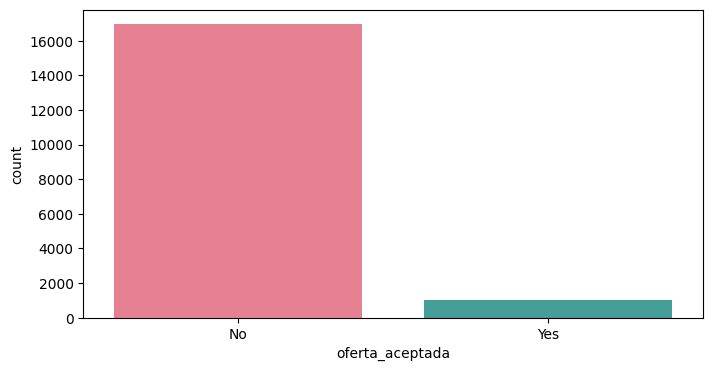

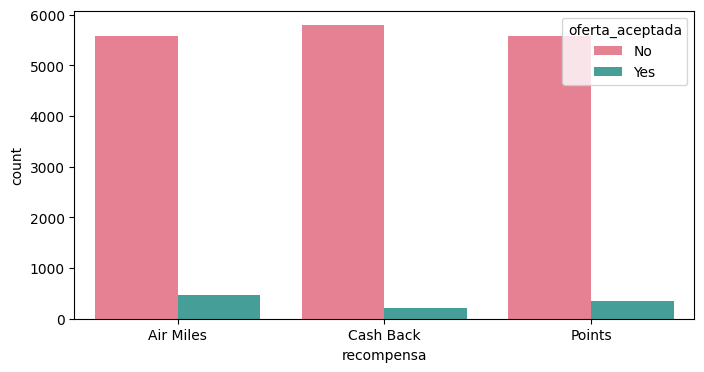

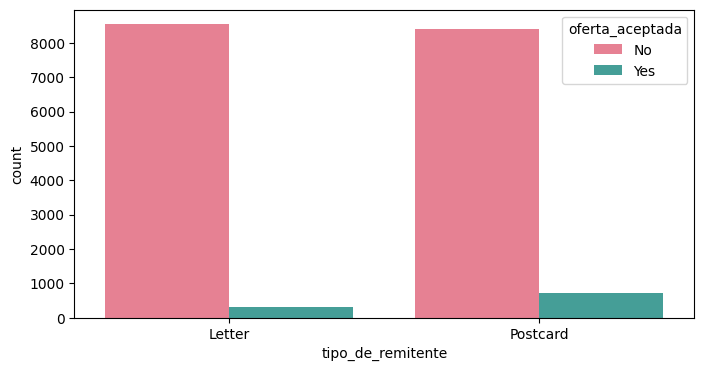

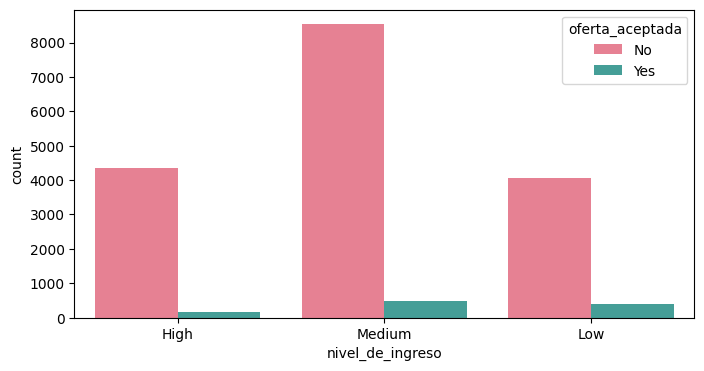

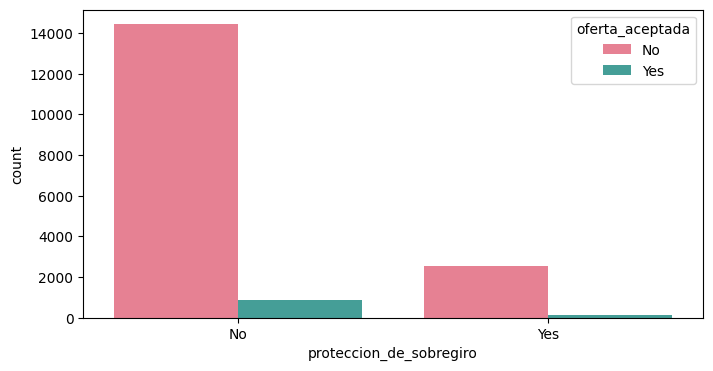

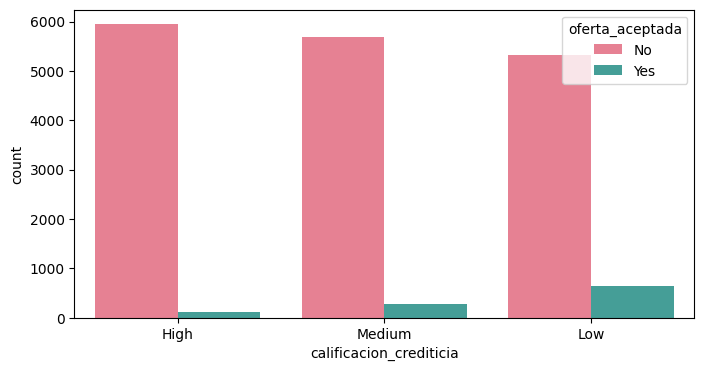

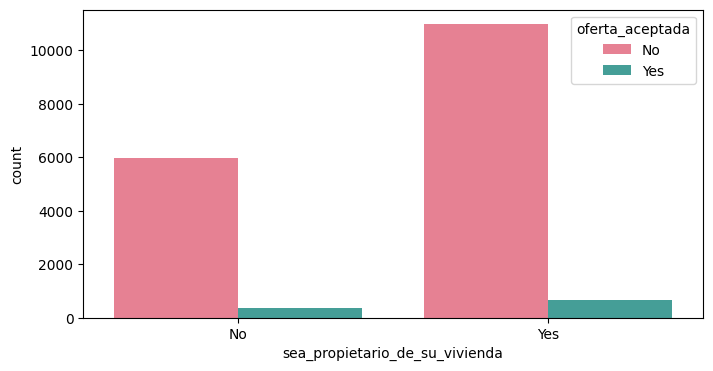

In [43]:
for column in df_categorical.columns[0:7]:
    if column not in ['customer_number']:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=df_categorical[column], hue=df['oferta_aceptada'], palette='husl')
        plt.show()

#### Codificacion de variables categoricas:

Codificaremos las variables categóricas utilizando la función map y OneHot.

In [44]:
codificacion_map = df_categorical[['recompensa','nivel_de_ingreso', 'calificacion_crediticia']].copy()

codificacion_map['recompensa'] = codificacion_map['recompensa'].map({"Air Miles": 0, "Cash Back": 1, "Points": 2})
# codificacion['tipo_de_remitente'] = codificacion['tipo_de_remitente'].map({"Letter": 0, "Postcard": 1})
codificacion_map['nivel_de_ingreso'] = codificacion_map['nivel_de_ingreso'].map({"Low": 0, "Medium": 1, "High": 2})
codificacion_map['calificacion_crediticia'] = codificacion_map['calificacion_crediticia'].map({"Low": 0, "Medium": 1, "High": 2})

In [45]:
codificacion_map

,recompensa,nivel_de_ingreso,calificacion_crediticia
id,,,
1,0,2,2
2,0,1,1
3,0,2,1
4,0,1,2
5,0,1,1
...,...,...,...
17996,1,2,0
17997,1,2,0
17998,1,2,0


In [46]:
for column in df_categorical.columns:
     if column in ['oferta_aceptada', 'tipo_de_remitente','proteccion_de_sobregiro', 'sea_propietario_de_su_vivienda']:
        enc = preprocessing.OneHotEncoder(drop='first', sparse_output=False)
        df_categorical[column] = enc.fit_transform(df_categorical[[column]])
        df_categorical[column] = pd.DataFrame(df_categorical[column])

In [47]:
columnas_a_eliminar = ['recompensa', 'nivel_de_ingreso', 'calificacion_crediticia']

# Crear un nuevo DataFrame eliminando las columnas especificadas
df_categorical_OneHot = df_categorical.drop(columns=columnas_a_eliminar)
df_categorical_OneHot

,oferta_aceptada,tipo_de_remitente,proteccion_de_sobregiro,sea_propietario_de_su_vivienda
id,,,,
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0
...,...,...,...,...
17996,0.0,0.0,0.0,1.0
17997,0.0,0.0,0.0,1.0
17998,0.0,0.0,0.0,0.0


In [48]:
df_categorical_concatenado = pd.concat([df_categorical_OneHot, codificacion_map], axis=1)

In [49]:
df_categorical_concatenado

,oferta_aceptada,tipo_de_remitente,proteccion_de_sobregiro,sea_propietario_de_su_vivienda,recompensa,nivel_de_ingreso,calificacion_crediticia
id,,,,,,,
1,0.0,0.0,0.0,0.0,0,2,2
2,0.0,0.0,0.0,1.0,0,1,1
3,0.0,1.0,0.0,1.0,0,2,1
4,0.0,0.0,0.0,0.0,0,1,2
5,0.0,0.0,0.0,1.0,0,1,1
...,...,...,...,...,...,...,...
17996,0.0,0.0,0.0,1.0,1,2,0
17997,0.0,0.0,0.0,1.0,1,2,0
17998,0.0,0.0,0.0,0.0,1,2,0


Voy a concatenar las columnas numericas y categoricas:

In [50]:
df_concatenado = pd.concat([df_numericas, df_categorical_concatenado], axis=1)
df_concatenado

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_promedio,saldo_T1,saldo_T2,saldo_T3,saldo_T4,oferta_aceptada,tipo_de_remitente,proteccion_de_sobregiro,sea_propietario_de_su_vivienda,recompensa,nivel_de_ingreso,calificacion_crediticia
id,,,,,,,,,,,,,,,,
1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0.0,0.0,0.0,0.0,0,2,2
2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,0.0,0.0,0.0,1.0,0,1,1
3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,0.0,1.0,0.0,1.0,0,2,1
4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0.0,0.0,0.0,0.0,0,1,2
5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0.0,0.0,0.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,1,1,1,5,167.50,136.0,65.0,71.0,398.0,0.0,0.0,0.0,1.0,1,2,0
17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0,0.0,0.0,0.0,1.0,1,2,0
17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0,0.0,0.0,0.0,0.0,1,2,0


# 5.Modelos

In [51]:
modelo_saldo_promedio = pd.concat([numerical_saldo_promedio_estand, df_categorical_concatenado], axis=1, join='inner')
modelo_saldo_promedio.head(3)

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_promedio,oferta_aceptada,tipo_de_remitente,proteccion_de_sobregiro,sea_propietario_de_su_vivienda,recompensa,nivel_de_ingreso,calificacion_crediticia
1,-0.541352,0.121161,1.863330,1.346760,-2.027382,0.0,0.0,0.0,0.0,0,2,2
2,1.575537,0.121161,-0.476212,-1.345162,-1.788324,0.0,0.0,0.0,1.0,0,1,1
3,1.575537,-1.133443,-0.476212,0.449452,0.806347,0.0,1.0,0.0,1.0,0,2,1


In [52]:
modelo_saldo_trimestral = pd.concat([numerical_saldo_trimestral_estand, df_categorical_concatenado], axis=1, join='inner')
modelo_saldo_trimestral.head(3)

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_T1,saldo_T2,saldo_T3,saldo_T4,oferta_aceptada,tipo_de_remitente,proteccion_de_sobregiro,sea_propietario_de_su_vivienda,recompensa,nivel_de_ingreso,calificacion_crediticia
1,-0.541352,0.121161,1.863330,1.346760,-1.973363,-1.998067,-2.098818,-0.696218,0.0,0.0,0.0,0.0,0,2,2
2,1.575537,0.121161,-0.476212,-1.345162,-0.793575,-1.420652,-1.862524,-1.048943,0.0,0.0,0.0,1.0,0,1,1
3,1.575537,-1.133443,-0.476212,0.449452,1.046546,1.635161,0.225748,-0.565470,0.0,1.0,0.0,1.0,0,2,1


In [53]:


modelo_saldo_promedio_sin_outliers = pd.concat([num_saldo_prom_estand_sin_outliers, df_categorical_concatenado], axis=1, join='inner')
modelo_saldo_promedio_sin_outliers.head(3)

,cuentas_bancarias_abiertas,tarjetas_de_credito_mantenidas,viviendas_en_propiedad,tamaño_de_vivienda,saldo_promedio,oferta_aceptada,tipo_de_remitente,proteccion_de_sobregiro,sea_propietario_de_su_vivienda,recompensa,nivel_de_ingreso,calificacion_crediticia
1,-0.541352,0.121161,1.863330,1.346760,-2.027382,0.0,0.0,0.0,0.0,0,2,2
2,1.575537,0.121161,-0.476212,-1.345162,-1.788324,0.0,0.0,0.0,1.0,0,1,1
3,1.575537,-1.133443,-0.476212,0.449452,0.806347,0.0,1.0,0.0,1.0,0,2,1


## Definición de las variables dependientes e independientes por modelos.

In [54]:
# modelo_saldo_promedio (numerical_saldo_promedio_estand + df_categorical_concatenado)
y = modelo_saldo_promedio['oferta_aceptada']
X = modelo_saldo_promedio.drop('oferta_aceptada', axis=1)

In [55]:
# modelo_saldo_promedio (numerical_saldo_trimestral_estand + df_categorical_concatenado)
y_2 = modelo_saldo_trimestral['oferta_aceptada']
X_2= modelo_saldo_trimestral.drop('oferta_aceptada', axis=1)

In [56]:
# modelo_saldo_promedio (num_saldo_prom_estand_sin_outliers + df_categorical_concatenado)
y_3 = modelo_saldo_promedio_sin_outliers['oferta_aceptada']
X_3 = modelo_saldo_promedio_sin_outliers.drop('oferta_aceptada', axis=1)

### Modelo saldo promedio

In [57]:
# modelo_saldo_promedio (numerical_saldo_promedio_estand + df_categorical_concatenado)
y = modelo_saldo_promedio['oferta_aceptada']
X = modelo_saldo_promedio.drop('oferta_aceptada', axis=1)

In [58]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.3, random_state=45)

# # Construir el modelo de regresión logística
logreg = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
logreg.fit(X_train_5, y_train_5)

# Hacer predicciones con los datos de prueba
y_pred_5 = logreg.predict(X_test_5)

cantidad_de_unos = np.count_nonzero(y_pred_5 == 1)

# Contar cuántos valores son iguales a 0
cantidad_de_ceros = np.count_nonzero(y_pred_5 == 0)

# Imprimir los resultados
print("Cantidad de valores iguales a 1 en y_pred:", cantidad_de_unos)
print("Cantidad de valores iguales a 0 en y_pred:", cantidad_de_ceros)

Cantidad de valores iguales a 1 en y_pred: 0
Cantidad de valores iguales a 0 en y_pred: 5386


In [59]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test_5, y_pred_5)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

Matriz de Confusión:
[[5079    0]
 [ 307    0]]


In [60]:
#evaluacion del modelo
accuracy = accuracy_score(y_test_5, y_pred_5)
precision = precision_score(y_test_5, y_pred_5, pos_label = 1)
recall = recall_score(y_test_5, y_pred_5, pos_label = 1)
f1 = f1_score(y_test_5, y_pred_5, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9430003713330858
Precision: 0.0
Recall: 0.0
F1 score: 0.0


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


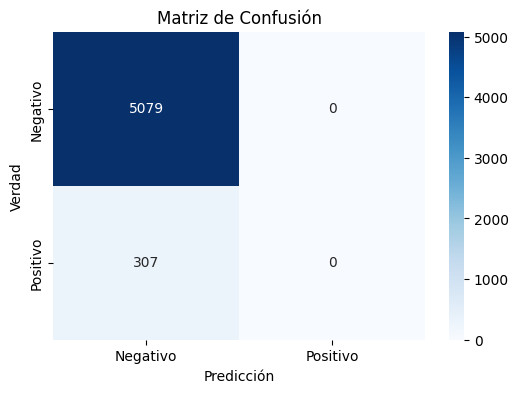

In [61]:
# Definir etiquetas para los ejes
etiquetas = ['Negativo', 'Positivo']

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.title('Matriz de Confusión')
plt.show()

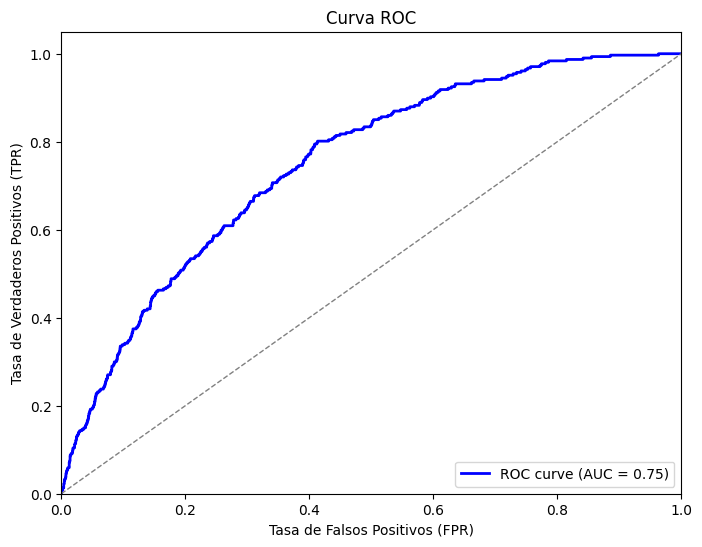

Área bajo la curva ROC (AUC-ROC): 0.7486780528881458


In [62]:
# Calcular las probabilidades de clase
probas = logreg.predict_proba(X_test_5)[:, 1]

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_5, probas)

# Calcular el Área bajo la curva ROC (AUC-ROC)
auc_roc = roc_auc_score(y_test_5, probas)

# Plotear la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Imprimir el valor del AUC-ROC
print("Área bajo la curva ROC (AUC-ROC):", auc_roc)



Los datos del DateFrene estan muy descompensado, por eso este modelo nos sale así.
Por lo tanto, vamos a realizar SMOTE.

Los datos del DateFrene estan muy descompensado, por eso este modelo nos sale así.
Por lo tanto, vamos a realizar SMOTE.

### Modelo saldo promedio con SMOTE:

Accuracy: 0.7324803149606299
Precision: 0.7153271028037383
Recall: 0.762046993229789
F1 score: 0.737948322406479


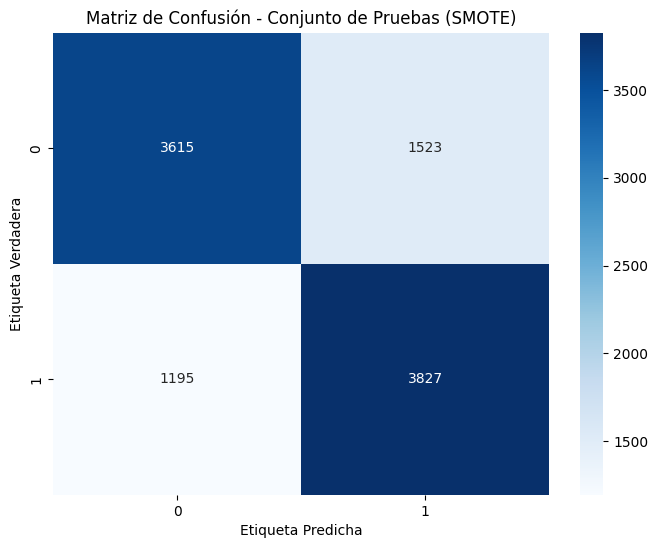

In [63]:

y = modelo_saldo_promedio['oferta_aceptada']
X = modelo_saldo_promedio.drop('oferta_aceptada', axis=1)

# Aplicar SMOTE al conjunto de datos
sm = SMOTE(random_state=100)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Dividir los datos resampleados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=100)

# Construir el modelo de regresión logística
model1 = LogisticRegression(random_state=100)
model1.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model1.predict(X_test)

# Calcular la matriz de confusión para el conjunto de pruebas
cm_test_smote = confusion_matrix(y_test, y_pred_resampled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_resampled)
precision = precision_score(y_test, y_pred_resampled, pos_label=1)
recall = recall_score(y_test, y_pred_resampled, pos_label=1)
f1 = f1_score(y_test, y_pred_resampled, pos_label=1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


Debido a que no me parece real, voy a entrenar el modelo con SMOTE y hacer predicciones sin él

Accuracy: 0.7111028592647605
Precision: 0.11710606989576947
Recall: 0.6221498371335505
F1 score: 0.19711042311661506


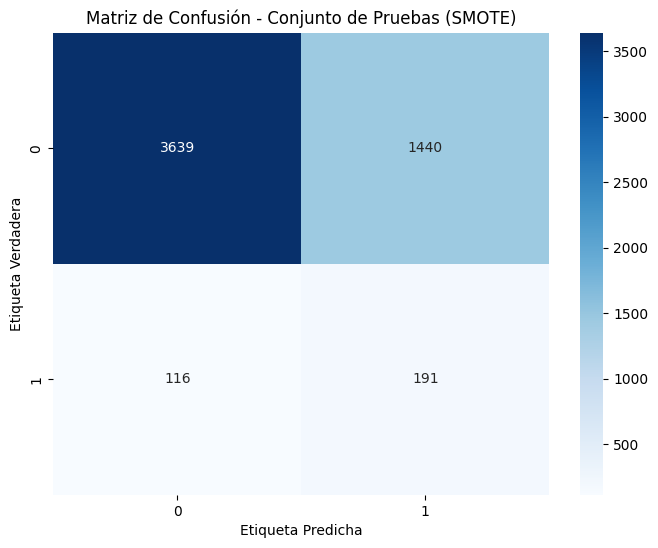

In [64]:
# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model1.predict(X_test_5)

# Calcular la matriz de confusión para el conjunto de pruebas
cm_test_smote = confusion_matrix(y_test_5, y_pred_resampled)

# Evaluar el modelo
accuracy = accuracy_score(y_test_5, y_pred_resampled)
precision = precision_score(y_test_5, y_pred_resampled, pos_label=1)
recall = recall_score(y_test_5, y_pred_resampled, pos_label=1)
f1 = f1_score(y_test_5, y_pred_resampled, pos_label=1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

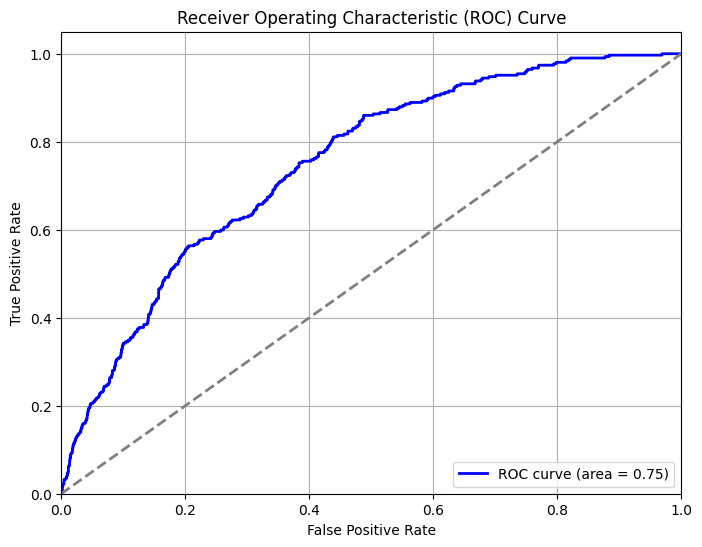

In [65]:

# Obtener las probabilidades de las predicciones
y_prob = model1.predict_proba(X_test_5)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_5, y_prob)

# Calcular el AUC
roc_auc = roc_auc_score(y_test_5, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Modelo saldo trimestres con SMOTE:

In [66]:
y_2 = modelo_saldo_trimestral['oferta_aceptada']
X_2= modelo_saldo_trimestral.drop('oferta_aceptada', axis=1)

Accuracy: 0.7494094488188976
Precision: 0.7284976005906239
Recall: 0.785941855834329
F1 score: 0.7561302681992337


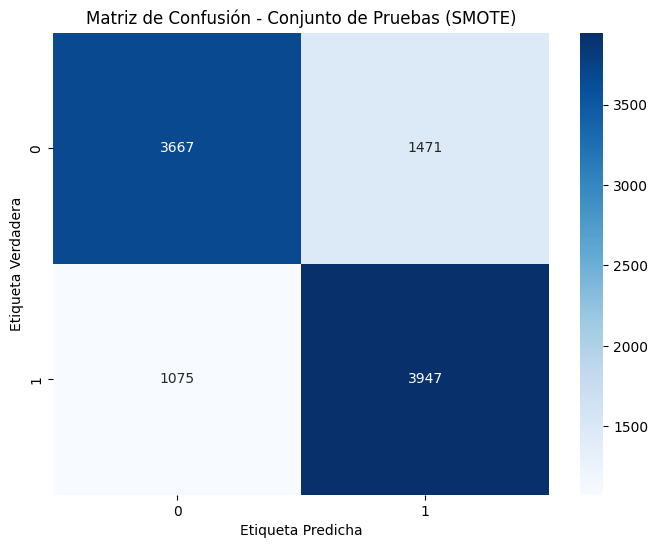

In [67]:
# Aplicar SMOTE al conjunto de datos
sm = SMOTE(random_state=100)
X_resampled_2, y_resampled_2 = sm.fit_resample(X_2, y_2)

# Dividir los datos resampleados en conjuntos de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_resampled_2, y_resampled_2, test_size=0.3, random_state=100)

# Construir el modelo de regresión logística
model_2 = LogisticRegression(random_state=100)
model_2.fit(X_train_2, y_train_2)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled_2 = model_2.predict(X_test_2)

# Calcular la matriz de confusión para el conjunto de pruebas
cm_test_smote_2 = confusion_matrix(y_test_2, y_pred_resampled_2)

# Evaluar el modelo
accuracy = accuracy_score(y_test_2, y_pred_resampled_2)
precision = precision_score(y_test_2, y_pred_resampled_2, pos_label=1)
recall = recall_score(y_test_2, y_pred_resampled_2, pos_label=1)
f1 = f1_score(y_test_2, y_pred_resampled_2, pos_label=1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote_2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Como he hecho antes, voy a entrenar el moelo con SMOTE, y la predicciones sin él.

In [68]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_2, y_2, test_size=0.3, random_state=45)

# # Construir el modelo de regresión logística
logreg = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
logreg.fit(X_train_6, y_train_6)

# Hacer predicciones con los datos de prueba
y_pred_6 = logreg.predict(X_test_6)

Accuracy: 0.7233568510954326
Precision: 0.1220447284345048
Recall: 0.6221498371335505
F1 score: 0.20405982905982906


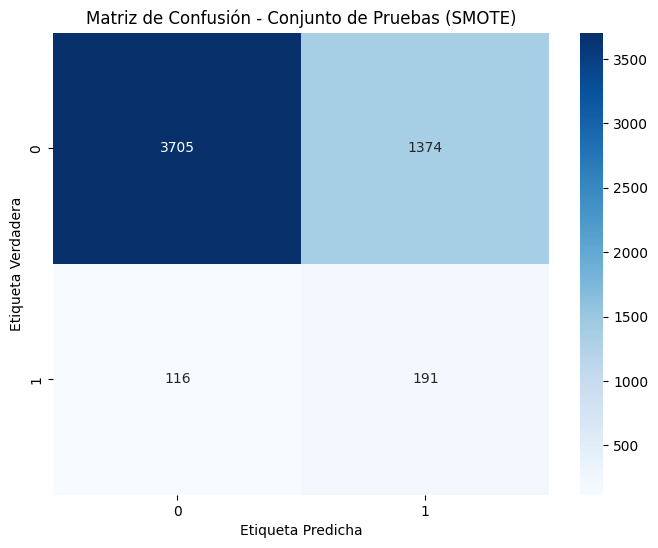

In [69]:

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_2.predict(X_test_6)

# Calcular la matriz de confusión para el conjunto de pruebas
cm_test_smote_2 = confusion_matrix(y_test_6, y_pred_resampled)

# Evaluar el modelo
accuracy = accuracy_score(y_test_6, y_pred_resampled)
precision = precision_score(y_test_6, y_pred_resampled, pos_label=1)
recall = recall_score(y_test_6, y_pred_resampled, pos_label=1)
f1 = f1_score(y_test_6, y_pred_resampled, pos_label=1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote_2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()





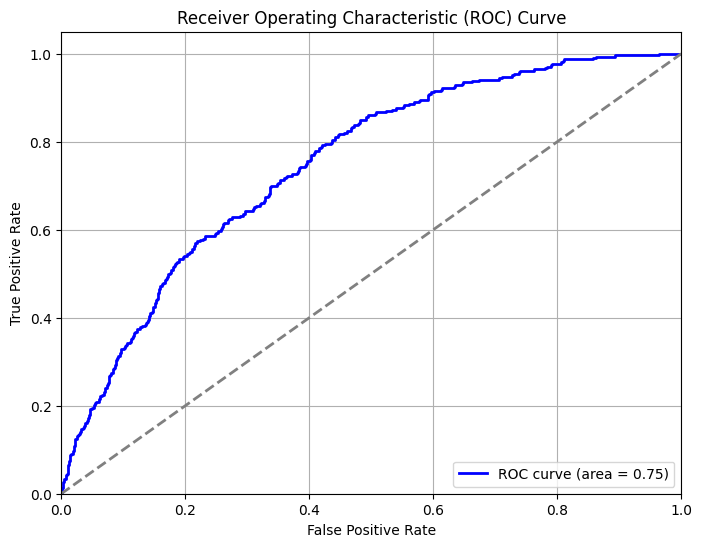

In [70]:
# Obtener las probabilidades de las predicciones
y_prob_2 = model_2.predict_proba(X_test_6)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_6, y_prob_2)

# Calcular el AUC
roc_auc = roc_auc_score(y_test_6, y_prob_2)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Modelo saldo promedio sin Outliers con SMOTE:

Accuracy: 0.7337796593482327
Precision: 0.7239334226133537
Recall: 0.7500495540138751
F1 score: 0.7367601246105919


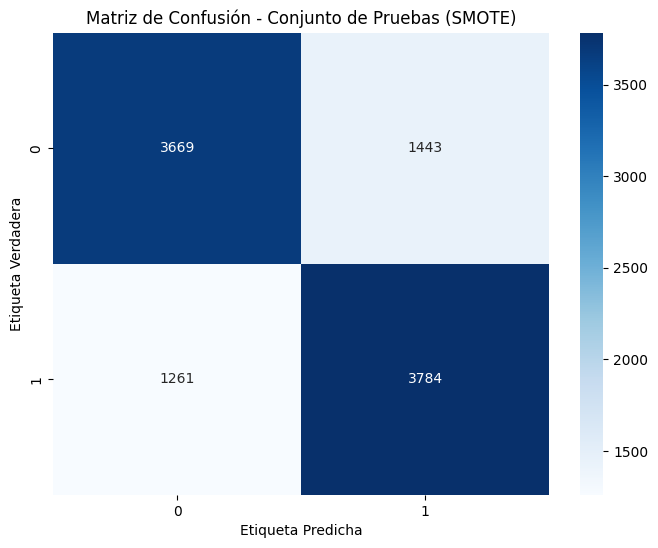

In [71]:
# modelo_saldo_promedio (num_saldo_prom_estand_sin_outliers + df_categorical_concatenado)
y_3 = modelo_saldo_promedio_sin_outliers['oferta_aceptada']
X_3 = modelo_saldo_promedio_sin_outliers.drop('oferta_aceptada', axis=1)

X_resampled_3, y_resampled_3 = sm.fit_resample(X_3, y_3)

# Dividir los datos resampleados en conjuntos de entrenamiento y prueba
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_resampled_3, y_resampled_3, test_size=0.3, random_state=100)

# Construir el modelo de regresión logística
model_3 = LogisticRegression(random_state=100)
model_3.fit(X_train_3, y_train_3)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled_3 = model_3.predict(X_test_3)

# Calcular la matriz de confusión para el conjunto de pruebas
cm_test_smote_3 = confusion_matrix(y_test_3, y_pred_resampled_3)

# Evaluar el modelo
accuracy = accuracy_score(y_test_3, y_pred_resampled_3)
precision = precision_score(y_test_3, y_pred_resampled_3, pos_label=1)
recall = recall_score(y_test_3, y_pred_resampled_3, pos_label=1)
f1 = f1_score(y_test_3, y_pred_resampled_3, pos_label=1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote_3, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

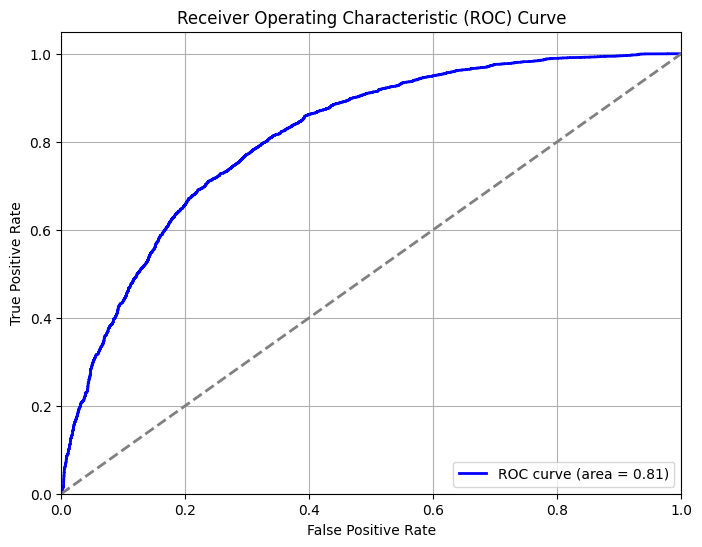

In [72]:
# Obtener las probabilidades de las predicciones
y_prob_3 = model_3.predict_proba(X_test_3)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_3, y_prob_3)

# Calcular el AUC
roc_auc = roc_auc_score(y_test_3, y_prob_3)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Vuelvo a realizar el ajuste anterior.

In [73]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_3, y_3, test_size=0.3, random_state=45)

# # Construir el modelo de regresión logística
logreg = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
logreg.fit(X_train_7, y_train_7)

# Hacer predicciones con los datos de prueba
y_pred_7 = logreg.predict(X_test_7)

Accuracy: 0.712852897473997
Precision: 0.11344019728729964
Recall: 0.6301369863013698
F1 score: 0.1922675026123302


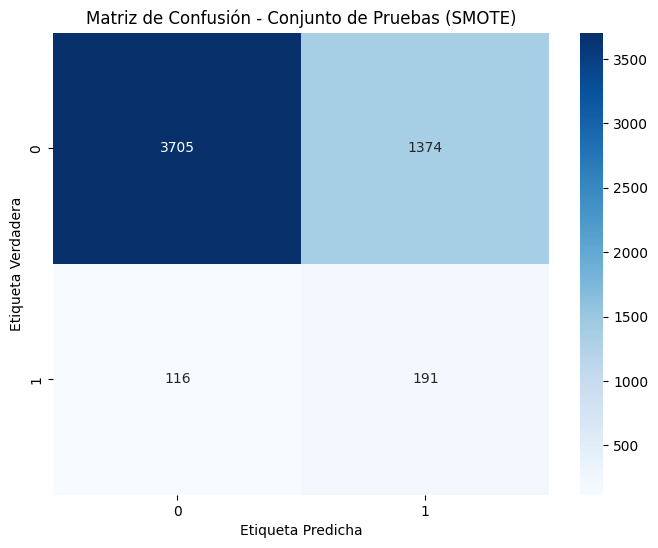

In [74]:
# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_3.predict(X_test_7)

# Calcular la matriz de confusión para el conjunto de pruebas
cm_test_smote_3 = confusion_matrix(y_test_7, y_pred_resampled)

# Evaluar el modelo
accuracy = accuracy_score(y_test_7, y_pred_resampled)
precision = precision_score(y_test_7, y_pred_resampled, pos_label=1)
recall = recall_score(y_test_7, y_pred_resampled, pos_label=1)
f1 = f1_score(y_test_7, y_pred_resampled, pos_label=1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_smote_2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (SMOTE)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

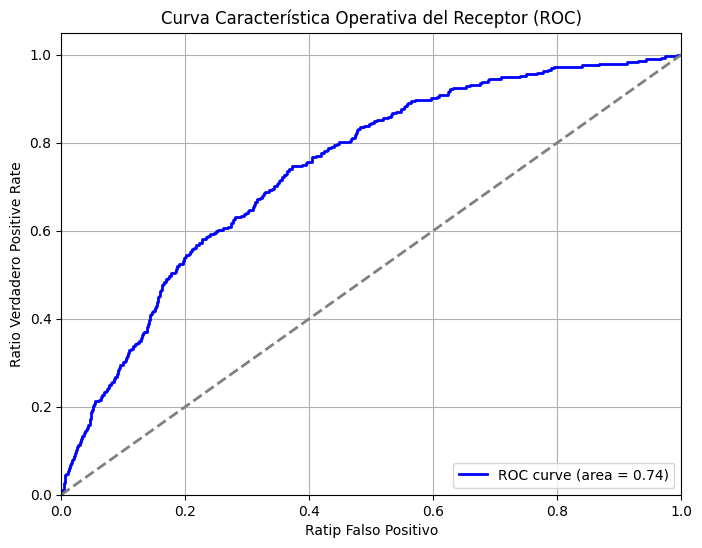

In [75]:
# Obtener las probabilidades de las predicciones
y_prob_3 = model_3.predict_proba(X_test_7)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_7, y_prob_3)

# Calcular el AUC
roc_auc = roc_auc_score(y_test_7, y_prob_3)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratip Falso Positivo')
plt.ylabel('Ratio Verdadero Positive Rate')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Los resultados de los 3 modelos son muy parecidos, elegiria el modelo saldo trimestres con SMOTE, porque sus resultados son algo mejores.
Sus resiltados son:

- Accuracy (Precisión): El modelo acertó aproximadamente el 72.34% de las veces.

- Precision (Precisión): Solo el 12.20% de las predicciones positivas fueron realmente positivas, lo que indica dificultades para identificar correctamente los casos positivos.

- Recall (Recuperación o Sensibilidad): El modelo capturó alrededor del 62.21% de todos los casos positivos en el conjunto de datos.

- F1 score: El puntaje F1 es del 20.41%, lo que sugiere un rendimiento general bajo, indicando que el modelo podría necesitar mejoras para equilibrar precisión y recall.

- Un valor de 0.74 para el Área Bajo la Curva (AUC) en la Curva Característica Operativa del Receptor (ROC) indica un rendimiento bastante bueno del modelo de clasificación


#### KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [77]:
for k in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2, y_train_2)
    
    y_pred_KNN = knn.predict(X_test_6)

    accuracy = accuracy_score(y_test_6, y_pred_KNN)
    

    print("Accuracy for K =", k, ":", accuracy)

Accuracy for K = 2 : 0.9578536947642035
Accuracy for K = 3 : 0.8416264389157074
Accuracy for K = 4 : 0.8676197549201634
Accuracy for K = 5 : 0.7881544745636836
Accuracy for K = 6 : 0.8145191236539175
Accuracy for K = 7 : 0.7543631637578908
Accuracy for K = 8 : 0.7784998143334572
Accuracy for K = 9 : 0.7296695135536576


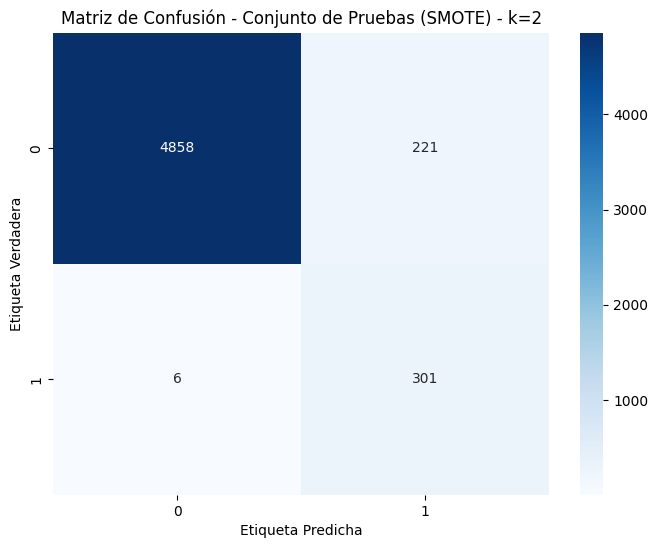

k=2
Accuracy: 0.9578536947642035
Precision: 0.5766283524904214
Recall: 0.9804560260586319
F1 score: 0.7261761158021713
---------------------------------


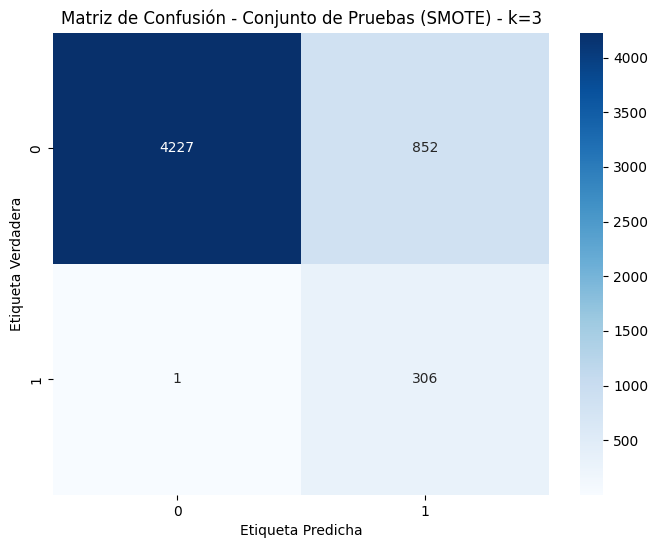

k=3
Accuracy: 0.8416264389157074
Precision: 0.26424870466321243
Recall: 0.996742671009772
F1 score: 0.41774744027303756
---------------------------------


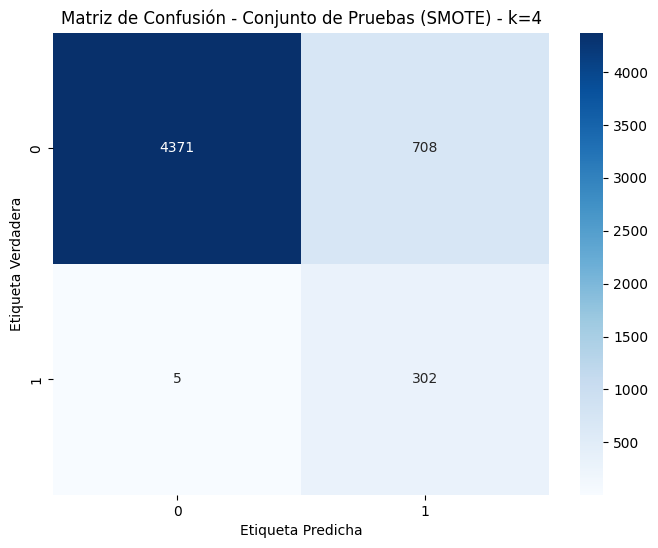

k=4
Accuracy: 0.8676197549201634
Precision: 0.299009900990099
Recall: 0.9837133550488599
F1 score: 0.45861807137433563
---------------------------------


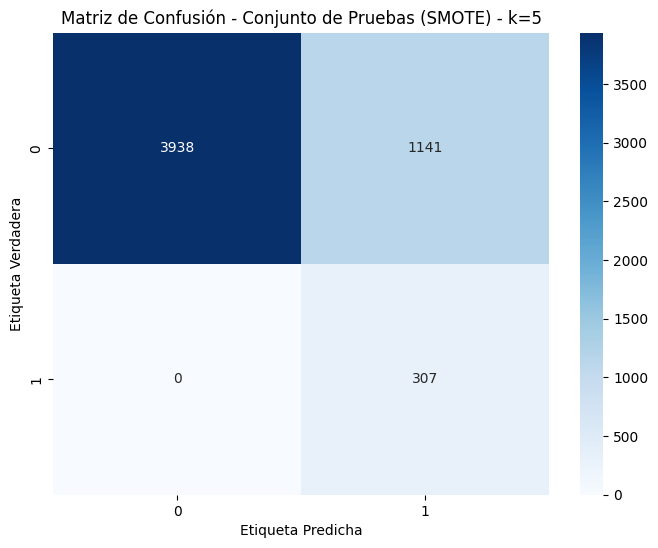

k=5
Accuracy: 0.7881544745636836
Precision: 0.21201657458563536
Recall: 1.0
F1 score: 0.34985754985754985
---------------------------------


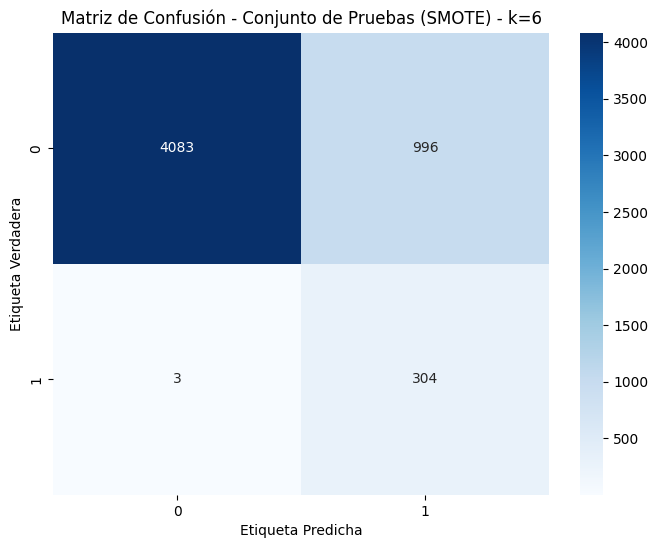

k=6
Accuracy: 0.8145191236539175
Precision: 0.23384615384615384
Recall: 0.990228013029316
F1 score: 0.37834474175482263
---------------------------------


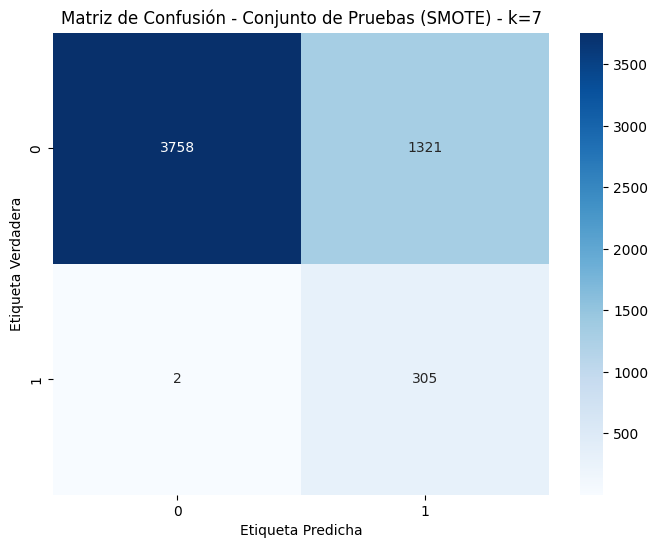

k=7
Accuracy: 0.7543631637578908
Precision: 0.1875768757687577
Recall: 0.993485342019544
F1 score: 0.3155716502845318
---------------------------------


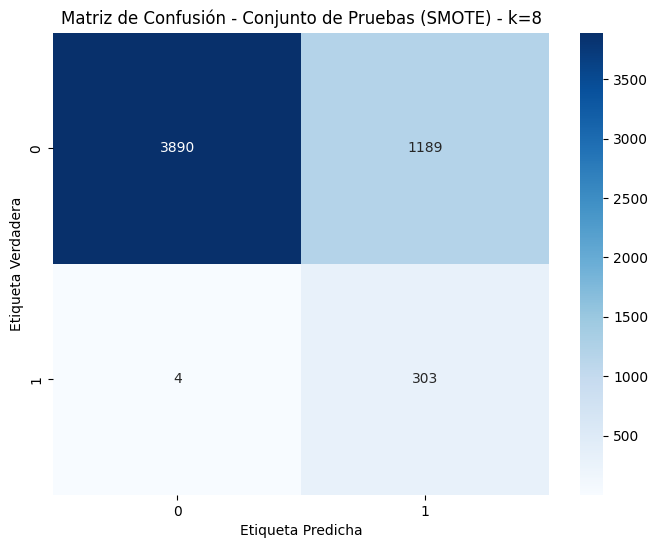

k=8
Accuracy: 0.7784998143334572
Precision: 0.20308310991957104
Recall: 0.9869706840390879
F1 score: 0.3368538076709283
---------------------------------


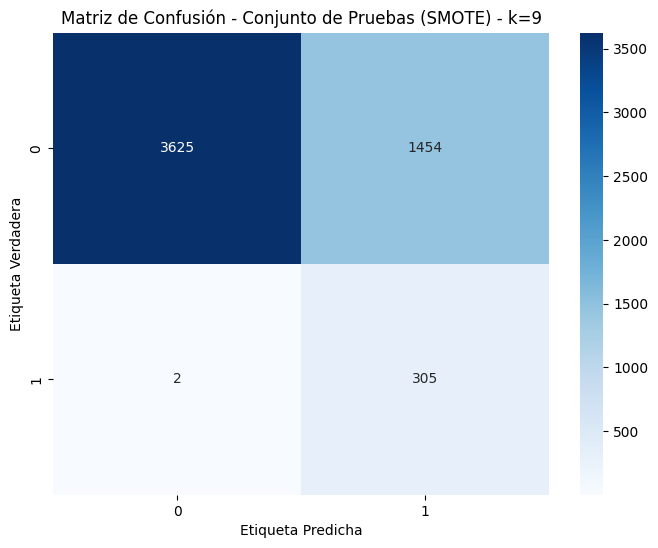

k=9
Accuracy: 0.7296695135536576
Precision: 0.17339397384877772
Recall: 0.993485342019544
F1 score: 0.2952565343659245
---------------------------------
Resumen de métricas:
k=2: Accuracy=0.9578536947642035, Precision=0.5766283524904214, Recall=0.9804560260586319, F1 score=0.7261761158021713
k=3: Accuracy=0.8416264389157074, Precision=0.26424870466321243, Recall=0.996742671009772, F1 score=0.41774744027303756
k=4: Accuracy=0.8676197549201634, Precision=0.299009900990099, Recall=0.9837133550488599, F1 score=0.45861807137433563
k=5: Accuracy=0.7881544745636836, Precision=0.21201657458563536, Recall=1.0, F1 score=0.34985754985754985
k=6: Accuracy=0.8145191236539175, Precision=0.23384615384615384, Recall=0.990228013029316, F1 score=0.37834474175482263
k=7: Accuracy=0.7543631637578908, Precision=0.1875768757687577, Recall=0.993485342019544, F1 score=0.3155716502845318
k=8: Accuracy=0.7784998143334572, Precision=0.20308310991957104, Recall=0.9869706840390879, F1 score=0.3368538076709283
k=9:

In [78]:

# Definir los valores de k para el bucle
k_values = range(2, 10)

# Crear listas para almacenar las métricas de evaluación para cada k
accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in k_values:
    # Entrenar el modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2, y_train_2)

    # Realizar predicciones
    y_pred_KNN = knn.predict(X_test_6)

    # Calcular la matriz de confusión
    cm_test_smote_7 = confusion_matrix(y_test_6, y_pred_KNN)

    # Crear el heatmap de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test_smote_7, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - Conjunto de Pruebas (SMOTE) - k={k}')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.show()

    # Evaluar el modelo
    accuracy = accuracy_score(y_test_6, y_pred_KNN)
    precision = precision_score(y_test_6, y_pred_KNN, pos_label=1)
    recall = recall_score(y_test_6, y_pred_KNN, pos_label=1)
    f1 = f1_score(y_test_6, y_pred_KNN, pos_label=1)

    # Almacenar las métricas
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Imprimir las métricas
    print(f'k={k}')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)
    print('---------------------------------')

# Opcional: Puedes imprimir un resumen de las métricas para todos los valores de k
print('Resumen de métricas:')
for i, k in enumerate(k_values):
    print(f'k={k}: Accuracy={accuracies[i]}, Precision={precisions[i]}, Recall={recalls[i]}, F1 score={f1_scores[i]}')


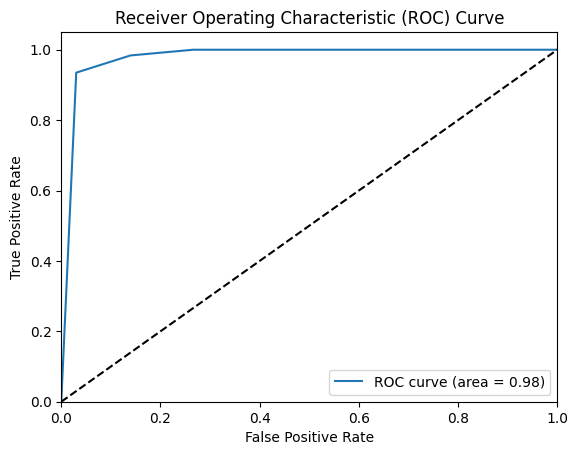

In [79]:
K = 4
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train_2, y_train_2)
y_pred_KNN = knn.predict(X_test_6)

# calculating the predicted probabilities of each class
y_prob_4 = knn.predict_proba(X_test_6)

# calculating the ROC curve for class 1 (positive class)
fpr, tpr, thresholds = roc_curve(y_test_6, y_prob_4[:, 1])

# calculating the AUC (area under the curve) score
auc = roc_auc_score(y_test_6, y_prob_4[:, 1])

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
    

#### MODELO RANDOM FOREST:

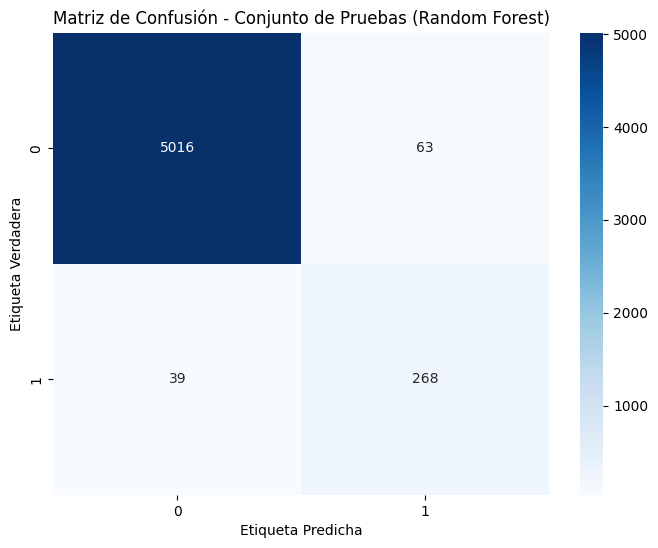

Random Forest Classifier
Accuracy: 0.9810620126253249
Precision: 0.8096676737160121
Recall: 0.8729641693811075
F1 score: 0.8401253918495298


In [80]:
# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_2, y_train_2)

# Realizar predicciones
y_pred_RF = rf.predict(X_test_6)

# Calcular la matriz de confusión
cm_test_rf = confusion_matrix(y_test_6, y_pred_RF)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Pruebas (Random Forest)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Evaluar el modelo
accuracy = accuracy_score(y_test_6, y_pred_RF)
precision = precision_score(y_test_6, y_pred_RF, pos_label=1)
recall = recall_score(y_test_6, y_pred_RF, pos_label=1)
f1 = f1_score(y_test_6, y_pred_RF, pos_label=1)

# Imprimir las métricas
print('Random Forest Classifier')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


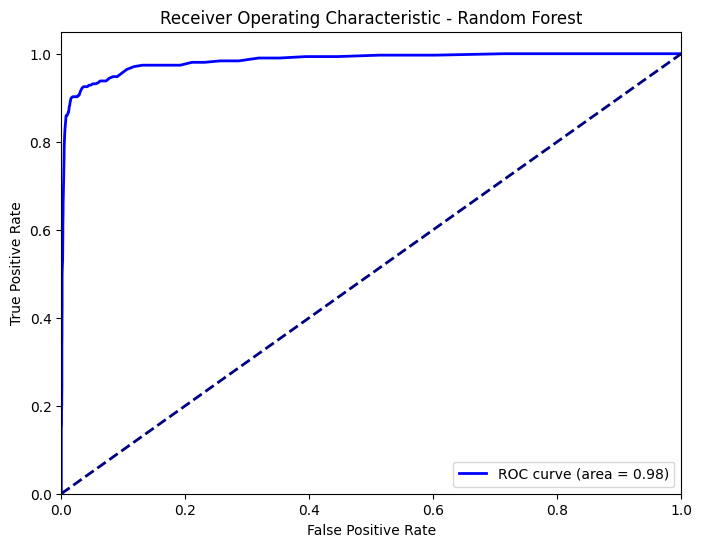

In [82]:

from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de las predicciones
y_prob_RF = rf.predict_proba(X_test_6)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_6, y_prob_RF)
roc_auc_forest = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_forest)  # Aquí cambiaste roc_auc a roc_auc_forest
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


Tras analizar los resultados, observamos que el modelo Random Forest ha mejorado significativamente el rendimiento en comparación con los otros modelos. Destaca por tener los mejores resultados globales, aunque aún presenta algunos falsos negativos. Sin embargo, en comparación con los modelos de KNN, encontramos menos falsos positivos. Aunque los modelos de KNN muestran un bajo número de falsos negativos, su tasa de falsos positivos es considerablemente alta. Por lo tanto, mi preferencia recae en el modelo Random Forest debido a su equilibrio entre falsos negativos y falsos positivos, lo que lo hace más adecuado.

## Conclusiones:

- Podemos ver que los datos estan muy desbalanceados, por lo que he tenido que SMOTE para balancearlos, aunque el entrenamiento del modelo lo he hecho con los datos balanceados.

- El modelo Random Forest destaca por su mejor rendimiento global, con menos falsos positivos que los modelos de KNN. Aunque los KNN tienen menos falsos negativos, su tasa de falsos positivos es alta. Por lo tanto, elijo el Random Forest debido a su equilibrio entre falsos negativos y positivos.

- Viendo las caracteristicas numéricas y categoricas, podemos decir que para mejorar los resultados, podriamos centrarnos en clientes con las siguientes caracteristicas. 

        - Nivel  de ingreso Media

        - Calificación crediticia Baja

        - Cuentas bancarias abiertas entre 1
    
        - Protección de sobregiro No
 
        - Tarjetas de crédito mantenidas 2

        - Número de viviendas propiedad del cliente 1

        - Tamaño de vivienda 3 - 4 personas

        - Recompensa Millas aereas

        - Tipo de remitente Postcard



: